# DS4A Project - Airlines Revenue Optimization 

Group members: Angela Guan, Sruthi Machina, Sherry Shi, Xinyue(Katherine) Zhang. 

**Objective**: Provide solutions for airline companies for develop data-driven pricing decisions using demand forecasting, customer segmentation and fare optimization 

In [0]:
# Gets datasets and imports them into Colab 
%%capture 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QqQZ14Z7agy2sZQZUCtzhrnc_pnDn0z5' -O 'flight_traffic.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IfKvqwJe8sBqM81oMhqwL5JUU0hLZ8RK' -O 'fares.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CyC7RcxD2zmlrsSJcNfw9-sAHTp4HNm0' -O 'events_US.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IJ8-Uqe_62nzkdB812mPVquiTPXFFgj9' -O 'airlines.csv'

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

def load_data():
  '''
  Loads the data and returns python dataframe
  '''
  airlines = pd.read_csv('airlines.csv')
  events = pd.read_csv('events_US.csv', encoding='latin-1')
  fares = pd.read_csv('fares.csv')
  flight = pd.read_csv('flight_traffic.csv')

  return airlines, events, fares, flight

airlines, events, fares, flight = load_data()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
airlines.head()


,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [0]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [0]:
events.head()

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference


In [0]:
events[events["event_name"] =="International Consumer Electronics Show (CES)"]

,date,city,state,event_name
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
6,6/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
10,7/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
13,8/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)


In [0]:
# the dates are day/month/year not month/day/year

In [0]:
events['clean_date'] = pd.to_datetime(events["date"]) #convert to data_time
#events.head()



In [0]:
nevada_events = events[events['state'] == 'NV'].sort_values('clean_date')
nevada_events.shape
# 56 events in Nevada 

(56, 5)

In [0]:
all_to_lv_flights = flight[flight["destination_airport"] == "LAS"]
all_to_lv_flights.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
71,2017,1,3,AA,DFW,LAS,910,902.0,24.0,926.0,1018.0,6.0,1009,1024.0,0,0,179.0,202.0,1055,0.0,0.0,15.0,0.0,0.0
72,2017,1,18,AA,DFW,LAS,905,901.0,29.0,930.0,956.0,8.0,1009,1004.0,0,0,184.0,183.0,1055,NaN,NaN,NaN,NaN,NaN
73,2017,1,22,AA,DFW,LAS,905,859.0,49.0,948.0,1029.0,8.0,1009,1037.0,0,0,184.0,218.0,1055,0.0,0.0,28.0,0.0,0.0
74,2017,1,26,AA,DFW,LAS,905,901.0,20.0,921.0,957.0,7.0,1009,1004.0,0,0,184.0,183.0,1055,NaN,NaN,NaN,NaN,NaN
75,2017,1,29,AA,DFW,LAS,905,900.0,21.0,921.0,938.0,6.0,1009,944.0,0,0,184.0,164.0,1055,NaN,NaN,NaN,NaN,NaN


In [0]:
all_las_fares = fares[fares["destination_airport"] == "LAS"]
# try to find mean of prices to Las Vegas, but they vary based on distance/itinerary too.
# start out simpler like SFO -> LAS and SJC -> LAS
sjc_las_temp = all_las_fares[all_las_fares["origin_airport"] == "SJC"]
sjc_las = sjc_las_temp[sjc_las_temp["quarter"] == 1]
sjc_las


,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
2293,1,--,SJC,LAS,386,0,1,2,6,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2676,1,DL,SJC,LAS,386,29,110,107,182,135,110,74,63,40,48,44,31,20,34,10,39,23,25,21,8,10,3,4,0,9,13,1,10,1,2,11,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4887,1,WN,SJC,LAS,386,123,271,604,676,720,736,493,361,749,450,258,321,495,113,187,70,103,75,31,28,19,19,85,24,12,10,70,15,16,28,4,23,5,35,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9714,1,UA,SJC,LAS,386,0,0,4,3,5,1,3,1,0,2,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


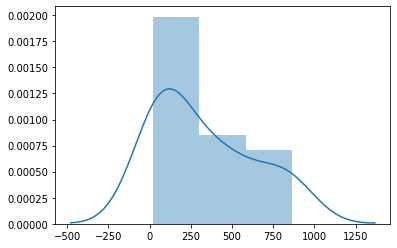

In [0]:
sns.distplot(sjc_las.iloc[:, 5:30].sum())
# total amount spend for tickets of each price level

In [0]:
# Looking at the columns in the fares table, we see columns representing price of tickets and the values reprensenting the count for a ticket at that price. 
# it didn't seem to make much sense at first, but summing up a column shows how much is spent for tickets at that price level
# For example, a ticket at $10 could have been a company/airline discount or promotion or purchased with mileage or heavily subsidized.

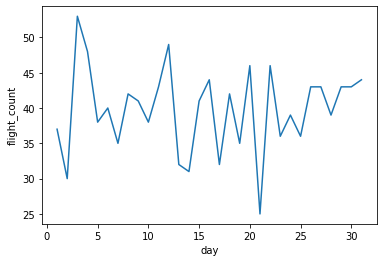

In [0]:
las_feb = flight[(flight['year'] == 2017) & 
       (flight['month'] == 1) & 
       (flight['destination_airport'] == 'LAS')].groupby(['day']).count().reset_index()

plot_data = las_feb.rename(columns={"year": "flight_count"})

sns.lineplot(x = 'day', y = 'flight_count', data = plot_data)

# distribution of flights to Las Vegas in January 2017

In [0]:
# maybe compare SJC, SFO, Seattle, New York (places considered a lot of high tech)

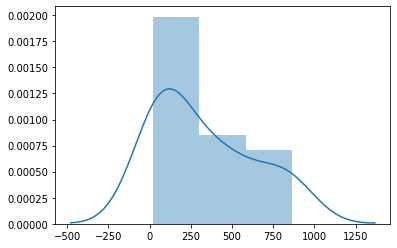

In [0]:
sns.distplot(sjc_las.iloc[:, 5:30].sum())

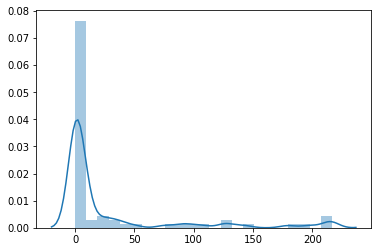

In [0]:
sns.distplot(sjc_las.iloc[:, 5:80].mean())

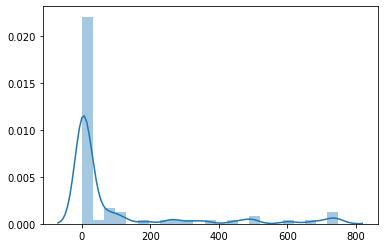

In [0]:
sns.distplot(sjc_las.iloc[:, 5:80].max())

In [0]:
def single_dest(airport):
  """ Takes in an airport code and outputs a table with flights to the airport"""
  to_airport = fares[fares["destination_airport"] == airport]
  return to_airport

In [0]:
single_dest("SEA").head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
80,1,HA,OGG,SEA,2640,24,3,4,0,1,1,1,2,1,1,3,12,4,10,8,18,27,27,39,36,9,69,95,22,32,10,35,18,36,57,47,53,30,55,33,...,0,0,0,7,1,0,0,0,0,0,0,9,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,26
119,1,AS,PDX,SEA,129,3206,2277,1527,1018,506,331,237,198,106,62,36,28,44,31,27,15,16,9,14,11,16,5,7,1,5,0,1,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
328,1,AS,RNO,SEA,564,5,32,36,91,112,107,165,162,82,80,68,119,71,192,76,31,41,41,42,39,9,15,50,9,16,5,5,5,6,14,3,5,6,4,2,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
340,1,DL,DTW,SEA,1927,52,8,25,7,18,27,24,22,23,40,37,55,45,75,77,95,86,83,102,81,98,86,87,90,91,104,96,100,74,71,102,79,66,89,55,...,0,0,2,1,1,0,1,0,2,0,0,0,2,0,0,1,0,2,0,1,0,0,1,2,1,1,0,0,0,0,0,0,2,2,0,1,1,0,0,22
357,1,DL,SLC,SEA,689,46,52,110,141,255,369,331,359,322,289,313,256,197,243,192,162,179,127,113,88,101,95,123,55,51,109,53,67,72,55,29,48,42,82,37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
# it'd be nice to figure out at what point to not include price columns. eg when the average is close to 0.
#we don't quite have enough data to find out what airport based on event

In [0]:
def given_month_event(month, some_event):
  """Takes in the month of the event and the event name and outputs a table with corresponding to the event"""
  event_table = events[events["event_name"] == some_event] 
  if month <=3:
    quarter = 1
  if month > 3 and month <= 6:
    quarter = 2
  if month > 6 and month <= 9:
    quarter = 3
  else: 
    quarter = 4
  new_fares = fares[fares["quarter"] == quarter]
  return event_table,new_fares

In [0]:
given_month_event(1, "International Consumer Electronics Show (CES)")

(      date       city  ...                                     event_name clean_date
 3   5/1/17  Las Vegas  ...  International Consumer Electronics Show (CES) 2017-05-01
 6   6/1/17  Las Vegas  ...  International Consumer Electronics Show (CES) 2017-06-01
 10  7/1/17  Las Vegas  ...  International Consumer Electronics Show (CES) 2017-07-01
 13  8/1/17  Las Vegas  ...  International Consumer Electronics Show (CES) 2017-08-01
 
 [4 rows x 5 columns],
        quarter airline_id origin_airport  ... 2480  2490  2500
 60930        4         WN            PHL  ...    0     0     0
 60931        4         WN            PHL  ...    0     0     0
 60932        4         WN            PHL  ...    0     0     0
 60933        4         WN            PHL  ...    0     0     2
 60934        4         WN            PHX  ...    0     0     0
 ...        ...        ...            ...  ...  ...   ...   ...
 80818        4         AA            STL  ...    0     0     0
 80819        4         WN       

Reframing our question and project direction a bit -> Airlines Revenue Prediction

**Research Question**: Provide solutions for airline companies to forecast quarterly revenue, and understand the casual relationship between airline companies' revenue and explanatory factors.

In [0]:
unique_airline_ids = flight['airline_id'].unique()
unique_airline_ids

array(['AA', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'WN', 'AS',
       'VX'], dtype=object)

In [0]:
airlines[airlines['airline_id'].isin(unique_airline_ids)]
# 12 unique airlines in dataset

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.
5,AS,Alaska Airlines Inc.
10,VX,Virgin America Inc.
12,B6,Jetblue Airways Corporation
17,F9,Frontier Airlines Inc.
18,NK,Spirit Airlines


In [0]:
fares.head()
fares['airline_id'].unique()

array(['AA', 'DL', 'UA', '--', 'WN', 'HA', 'AS', '9K', 'BB', 'KS', 'ZK',
       'VX', '3M', 'B6', 'MW', 'SY', 'WP', '7H', 'F9', 'NK', 'OO', 'C5',
       'G4', 'VS', 'NZ', 'EI', 'VA', 'LA', 'TP', 'QF', 'NH', 'AF', 'YX',
       'OZ', 'AC', 'YV', 'SQ', '4B', 'FI', 'BA', 'MH', 'LY', 'WS', 'LH',
       'QR', 'KL', 'SK', 'EK', 'OK', 'G3', 'JL', 'TK', 'EV', 'SN', 'CZ',
       'PR', 'EY', 'AV', 'QX', 'JJ'], dtype=object)

In [0]:
#dropping the missing values with airline_id == '--'
fares = fares[fares['airline_id'] != '--']
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [0]:
def add_quarter_for_table(table):
  """Takes in a table and outputs the table with a new column for quarter"""
  quarter = []
  for month in table['month']:
    if month <=3:
      quarter.append(1)
    if month <= 6:
      quarter.append(2)
    if month <= 9:
      quarter.append(3)
    else: 
      quarter.append(4)
  table['quarter'] = quarter
  return table.reset_index()

#add_quarter_for_table(flight)
#error for length/index

In [0]:
quarter = []
for i in flight['month']:
  if i <= 3:
    quarter.append(1)
  elif i <= 6:
    quarter.append(2)
  elif i <= 9:
    quarter.append(3)
  else:
    quarter.append(4)
flight['quarter'] = quarter 

In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,quarter
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN,1
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN,1
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN,1


Add a new column named flight_route into flight table

In [0]:
flight['flight_route'] = flight['origin_airport'] + ' --> ' + flight['destination_airport']

Compute quarterly revenue for every airline

In [0]:
# Calculate the quarterly revenue for an airline of a company 
fare_bucket = list(fares.iloc[:,5:].columns)
temp, fares_by_route = fares.iloc[:,0:5].copy(), fares.iloc[:,0:5].copy()
revenue = []

for i in np.arange(len(fare_bucket)):
  temp[int(fare_bucket[i])] = fares.iloc[:,5+i] * int(fare_bucket[i])
for j in np.arange(len(fares)):
  revenue.append(sum(temp.iloc[j,5:]))

fares_by_route['quarterly_revenue'] = revenue

# Calculate the quarterly revenue for each airline company 
fares_by_company = fares_by_route.groupby(['airline_id', 'quarter']).sum()[['quarterly_revenue']].reset_index()

In [0]:
fares_by_route.sort_values('quarterly_revenue', ascending = False).head()

,quarter,airline_id,origin_airport,destination_airport,distance,quarterly_revenue
63465,4,UA,SFO,EWR,2565,12122820
20384,2,UA,EWR,SFO,2565,11574400
20365,2,UA,SFO,EWR,2565,11139430
65643,4,UA,EWR,SFO,2565,10661510
41143,3,UA,EWR,SFO,2565,10255590


In [0]:
fares_by_company.head()

,airline_id,quarter,quarterly_revenue
0,3M,1,65450
1,3M,2,122730
2,3M,3,76430
3,3M,4,54090
4,4B,2,6130


In [0]:
fares_by_company['airline_id'].unique()

array(['3M', '4B', '7H', '9K', 'AA', 'AC', 'AF', 'AS', 'AV', 'B6', 'BA',
       'BB', 'C5', 'CZ', 'DL', 'EI', 'EK', 'EV', 'EY', 'F9', 'FI', 'G3',
       'G4', 'HA', 'JJ', 'JL', 'KL', 'KS', 'LA', 'LH', 'LY', 'MH', 'MW',
       'NH', 'NK', 'NZ', 'OK', 'OO', 'OZ', 'PR', 'QF', 'QR', 'QX', 'SK',
       'SN', 'SQ', 'SY', 'TK', 'TP', 'UA', 'VA', 'VS', 'VX', 'WN', 'WP',
       'WS', 'YV', 'YX', 'ZK'], dtype=object)

In [0]:
fares_by_company.sort_values('quarterly_revenue', ascending = False).head()

,airline_id,quarter,quarterly_revenue
16,AA,2,819721540
141,WN,2,794286160
18,AA,4,786687090
46,DL,2,756565130
17,AA,3,752466610


In [0]:
fares_by_company.groupby(['quarter']).sum()

,quarterly_revenue
quarter,
1,3273146290
2,3892158040
3,3580733570
4,3677642780


In [0]:
passenger = []
for k in np.arange(len(fares)):
  passenger.append(sum(fares.iloc[k,5:]))
fares_by_route['passenger_per_quarter'] = passenger

In [0]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
fares_by_route.head()

,quarter,airline_id,origin_airport,destination_airport,distance,quarterly_revenue,passenger_per_quarter
0,1,AA,CLT,SGF,708,98510,611
1,1,DL,DTW,SAN,1956,1041350,2232
2,1,DL,MSP,ISN,546,74660,594
3,1,AA,CLT,RDU,130,183630,6731
4,1,DL,ATL,RIC,481,910770,8282


To understand what factors impact the quarterly revenue of a airline company, we will explore the following features:


* Total number of flights per quarter
*   Total number of distinct flight routes per quarter
*   How many popular routes operated by the company per quarter
*   Average price per passenger


1) Total number of flights per quarter

Hypothesis: Having more flights may lead to higher revenue in that quarter

In [0]:
# Total number of flights per quarter per airline id 
flight_per_quarter = flight.groupby(["quarter", "airline_id"]).size().reset_index(name = 'number_of_flight_per_quarter')

# Joins with fares_by_company
quarter_revenue_num_flight = pd.merge(fares_by_company, flight_per_quarter, how = 'inner', on = ['quarter', 'airline_id'])
quarter_revenue_num_flight.head()

,airline_id,quarter,quarterly_revenue,number_of_flight_per_quarter
0,AA,1,706493640,21930
1,AA,2,819721540,22800
2,AA,3,752466610,23173
3,AA,4,786687090,22016
4,AS,1,180126550,4351


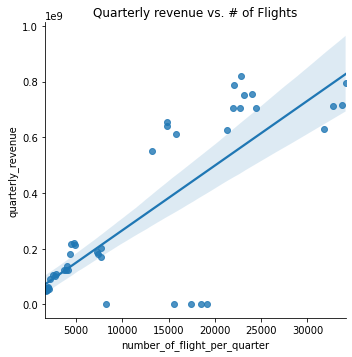

In [0]:
sns.lmplot(x = 'number_of_flight_per_quarter', 
            y = 'quarterly_revenue', 
            data = quarter_revenue_num_flight)

ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of Flights');             

We do observe a generally positive correlation as we expected. However, there're five points in the bottom that significantly deviate from our regression line. We will further look into that

In [0]:
quarter_revenue_num_flight.sort_values("quarterly_revenue").head(5)

,airline_id,quarter,quarterly_revenue,number_of_flight_per_quarter
16,EV,3,300,8204
32,OO,4,25040,18508
31,OO,3,71420,19193
29,OO,1,84880,15587
30,OO,2,1150520,17452


In [0]:
airlines[(airlines['airline_id'] == 'EV') | (airlines['airline_id'] =='OO')]

,airline_id,airline_name
19,OO,SkyWest Airlines
51,EV,ExpressJet Airlines Inc.


Both SkyWest Airlines and ExpressJet Airlines are subsidary/contractor of other big airline companies. They are different from the other 10 mainline companies in the flight table so removing these outliers seems to be a resonable approach since our focus is to predict revenue for mainline companies.

In [0]:
# Removes 'OO' and 'EV' from all the tables used for analysis 
airlines = airlines[(airlines['airline_id'] != 'EV') & (airlines['airline_id'] !='OO')]
fares_by_company = fares_by_company[(fares_by_company['airline_id'] != 'EV') & (fares_by_company['airline_id'] !='OO')]
filtered_quarter_revenue_num_flight = quarter_revenue_num_flight[(quarter_revenue_num_flight['airline_id'] != 'EV') & 
                           (quarter_revenue_num_flight['airline_id'] != 'OO')]                          

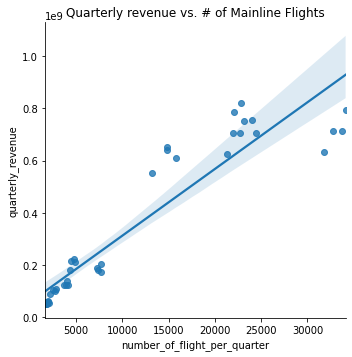

In [0]:
sns.lmplot(x = 'number_of_flight_per_quarter', 
            y = 'quarterly_revenue', 
            data = filtered_quarter_revenue_num_flight)
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of Mainline Flights');

There is a positive correlation between the number of flights and the quarterly revenue.
Companies with 150k-250k flights per quarter had roughly the same(or even more) revenue as companies with more than 350k flights.

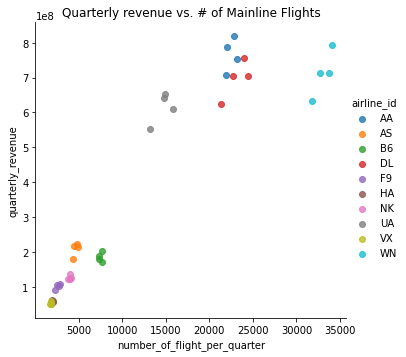

In [0]:
sns.lmplot(x = 'number_of_flight_per_quarter', 
            y = 'quarterly_revenue', 
            fit_reg=False,
            hue = 'airline_id',
            data = filtered_quarter_revenue_num_flight); 
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of Mainline Flights'); 

Adding airline_id as a color factor, we can roughly group companies into three clusters based on the number of flight per quarter.
Low: companies with < 100k flights per quarter(Ex. Alaska, JetBlue)
Medium: companies with 150k - 250k flights per quarter(Ex. AA, Delta, UA)
High: companies with > 350k flights per quarter(Southwest)

2) Total number of distinct flight routes per quarter

Hypothesis: companies with more diverse flight routes may have generated more revenue in that quarter.

In [0]:
# Distinct light routes per quarter per airline id
route_by_company = flight[['quarter', 'airline_id', 'flight_route']].drop_duplicates()
route_by_company.head()

,quarter,airline_id,flight_route
0,1,AA,CLT --> PHX
1,1,AA,FLL --> CLT
5,1,AA,RSW --> CLT
6,1,AA,CLT --> ATL
7,1,AA,PBI --> CLT


In [0]:
numb_route_per_id = route_by_company.groupby(['airline_id', 'quarter']).size().reset_index(name = 'number_of_route_per_quarter')
numb_route_per_id.head(8)

,airline_id,quarter,number_of_route_per_quarter
0,AA,1,653
1,AA,2,685
2,AA,3,678
3,AA,4,688
4,AS,1,248
5,AS,2,260
6,AS,3,254
7,AS,4,264


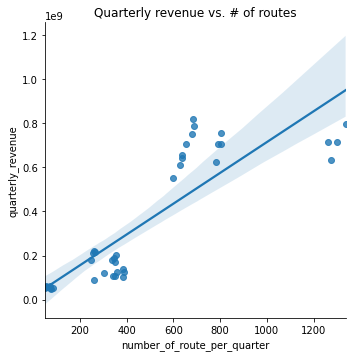

In [0]:
# Joins with fares_by_company
quarter_revenue_num_route = pd.merge(numb_route_per_id, fares_by_company, how = 'inner', on = ['quarter', 'airline_id'])
sns.lmplot(x = 'number_of_route_per_quarter', 
            y = 'quarterly_revenue', 
            data = quarter_revenue_num_route)
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of routes'); 

There is a positive correlation between the number of routes and the quarterly revenue.
Companies with 600-800 routes per quarter had roughly the same(or even more) revenue as companies with more than 1200 routes.

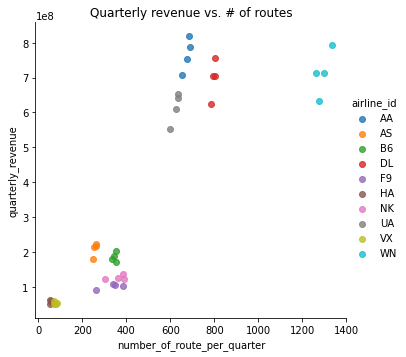

In [0]:
sns.lmplot(x = 'number_of_route_per_quarter', 
            y = 'quarterly_revenue', 
            fit_reg=False,
            hue = 'airline_id',
            data = quarter_revenue_num_route)
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of routes'); 

Similar to what we had in part 1), three clusters are defined as follows:
Low: companies with < 400 routes per quarter(Ex. Alaska, JetBlue)
Medium: companies with 600-800 routes per quarter(Ex. AA, Delta, UA)
High: companies with > 1200 routes per quarter(Southwest)

Combined with what we've found in part 1), we conclude that:

More flights or more routes are not necessarily indicative of high revenue: some companies in the medium range of Number of flight and Number of routes also yield fair amount of revenue(Ex. AA, Delta, UA), which leads to our next question: what factors could be indicative of the revenue of a company?

3) How many popular routes operated by the company per quarter

To define what 'popular routes' are, we first need to define 'popular flight origin and destination'.

In [0]:
top_10_origin = flight.groupby('origin_airport').size().reset_index(name = 'number_of_flights').sort_values('number_of_flights', ascending = False)
top_10_origin.head(10)

,origin_airport,number_of_flights
20,ATL,36275
223,ORD,26707
81,DEN,22529
171,LAX,21689
82,DFW,18117
274,SFO,17621
235,PHX,15282
169,LAS,15196
273,SEA,13666
211,MSP,13542


In [0]:
top_10_destination = flight.groupby('destination_airport').size().reset_index(name = 'number_of_flights').sort_values('number_of_flights', ascending = False).head(10)
top_10_destination

,destination_airport,number_of_flights
20,ATL,36219
224,ORD,26663
82,DEN,22540
172,LAX,21549
83,DFW,18144
275,SFO,17217
236,PHX,15589
170,LAS,15127
274,SEA,13818
212,MSP,13479


Here we see top_10_origin are the same as top_10_destination. We will use top_10_destination for now.

We define popular_route as both the flight origin or the destination are in the top_10_destination list.

In [0]:
popular_flight = flight[(flight['origin_airport'].isin(top_10_destination['destination_airport'])) &
       (flight['destination_airport'].isin(top_10_destination['destination_airport']))]
popular_flight_count = popular_flight[['quarter', 'airline_id', 'flight_route']].drop_duplicates().groupby(['quarter', 'airline_id']).count().reset_index()
popular_flight_count.head()

,quarter,airline_id,flight_route
0,1,AA,58
1,1,AS,18
2,1,B6,2
3,1,DL,50
4,1,EV,3


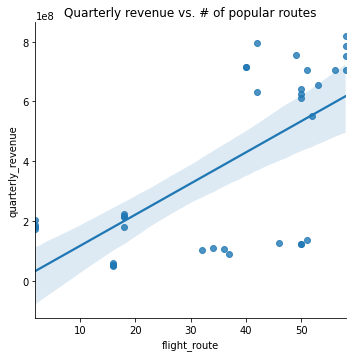

In [0]:
# Joins with fares_by_company
quarter_revenue_num_route = pd.merge(popular_flight_count, fares_by_company, how = 'inner', on = ['quarter', 'airline_id'])
sns.lmplot(x = 'flight_route', 
            y = 'quarterly_revenue', 
            data = quarter_revenue_num_route)
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of popular routes'); 

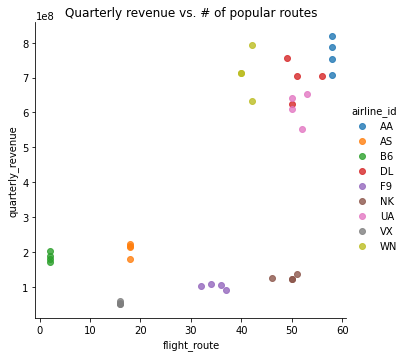

In [0]:
quarter_revenue_num_route = pd.merge(popular_flight_count, fares_by_company, how = 'inner', on = ['quarter', 'airline_id'])
sns.lmplot(x = 'flight_route', 
            y = 'quarterly_revenue',
            fit_reg=False, 
            hue = 'airline_id',
            data = quarter_revenue_num_route)
ax = plt.gca()
ax.set_title('Quarterly revenue vs. # of popular routes'); 

Here, we observe that companies with more popular routes do have higher quarterly revenue.

However, companies like F9(Frontier) and NK(Spirit) have fair number of popular routes, they seem to have very low revenue. On the contrary, WN(SouthWest) and UA(united airline) have very similar values in the number of popular flight but significantly higher revenue

We will further investigate into such a difference.

4) Average price per seat per flight

In [0]:
fares_by_route['avg_price_per_seat'] = fares_by_route['quarterly_revenue'] / fares_by_route['passenger_per_quarter']

Now we want to compare F9 and NK with

For high-cost carriers,

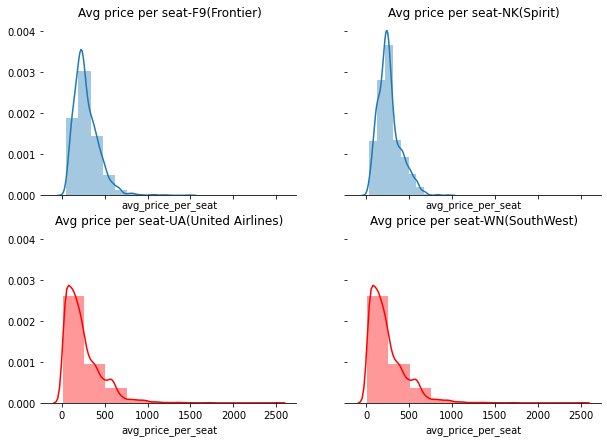

In [0]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
sns.despine(left=True)
F9 = fares_by_route[fares_by_route['airline_id'] == 'F9']['avg_price_per_seat']
NK = fares_by_route[fares_by_route['airline_id'] == 'NK']['avg_price_per_seat']
AA = fares_by_route[fares_by_route['airline_id'] == 'UA']['avg_price_per_seat']
DL = fares_by_route[fares_by_route['airline_id'] == 'WN']['avg_price_per_seat']

sns.distplot(F9, bins=10, ax=axes[0, 0]).set_title('Avg price per seat-F9(Frontier)');
sns.distplot(NK, bins=10, ax=axes[0, 1]).set_title('Avg price per seat-NK(Spirit)');
sns.distplot(AA, bins=10, color = 'red', ax=axes[1, 0]).set_title('Avg price per seat-UA(United Airlines)');
sns.distplot(AA, bins=10, color = 'red', ax=axes[1, 1]).set_title('Avg price per seat-WN(SouthWest)');

The distributions of average price per seat for low-cost carriers and high-cost carriers are skewed to the right, indicating that most of their price ticket per person fall below $500.

However, for high-cost carriers like UA and WN, there is a very long tail all the way to the right end at $2500, whereas low-cost carriers do not have tail that goes beyond $1500. Also, high-cost carriers have more tickets in the bucket from $500 to $1000 than low-cost carriers do.

Now let's look at the flights with usually high price(>$2000) but very small number of passengers(< 3).

We'll call them private flight.

In [0]:
#fares_by_route[(fares_by_route['avg_price_per_seat'] > 1500) &(fares_by_route['passenger'] < 3)]['airline_id'].unique()

It turns out that companies that operate private flights are those with the highest revenue.

In [0]:
# QF is an Australian airline company so we'll exclude it from our list bc we're mainly focused with U.S domestic companies. 
airlines[airlines['airline_id'] == 'QF']

,airline_id,airline_name
28,QF,Qantas Airways Ltd.


Text(0.5, 1.0, 'Avg price per seat-QF')

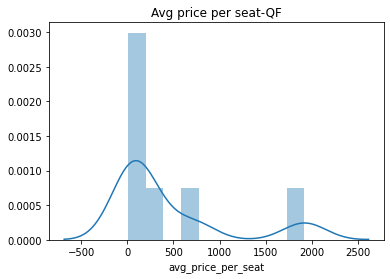

In [0]:
QF_seat = fares_by_route[fares_by_route['airline_id'] == 'QF']['avg_price_per_seat']
sns.distplot(QF_seat, bins=10).set_title('Avg price per seat-QF')


**3/24/2020**

Now, to refocus our research question again to look at four airlines:
1. American Airline (AA)
2. Southwest (SW)
3. United Airline (UA)
4. Delta (DL)*italicized text*

Question: 
For a given airline, what are the top profitable routes?


In [0]:
flight['flight_route'] = flight['origin_airport'] + ' --> ' + flight['destination_airport']
delta_flights = flight[flight["airline_id"] == "DL"]
delta_flights.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,flight_route
2033,2017,1,1,DL,ATL,SLC,1759,1802.0,14.0,1816.0,1952.0,23.0,2016,2015.0,0,0,257.0,253.0,1590,NaN,NaN,NaN,NaN,NaN,ATL --> SLC
2034,2017,1,1,DL,JFK,SLC,1600,1603.0,20.0,1623.0,1904.0,7.0,1934,1911.0,0,0,334.0,308.0,1990,NaN,NaN,NaN,NaN,NaN,JFK --> SLC
2035,2017,1,1,DL,LAX,ATL,900,915.0,15.0,930.0,1604.0,7.0,1614,1611.0,0,0,254.0,236.0,1946,NaN,NaN,NaN,NaN,NaN,LAX --> ATL
2036,2017,1,1,DL,LAX,ATL,1230,1242.0,12.0,1254.0,1933.0,12.0,1948,1945.0,0,0,258.0,243.0,1946,NaN,NaN,NaN,NaN,NaN,LAX --> ATL
2037,2017,1,1,DL,IAH,ATL,1405,1400.0,12.0,1412.0,1640.0,13.0,1709,1653.0,0,0,124.0,113.0,689,NaN,NaN,NaN,NaN,NaN,IAH --> ATL


In [0]:
most_common_dl = delta_flights.groupby("flight_route").count().iloc[ :, 1].to_frame().sort_values("month", ascending = False).rename(columns = {"month" : "count"}).reset_index()
most_common_dl.head()

,flight_route,count
0,MCO --> ATL,600
1,ATL --> LGA,596
2,ATL --> MCO,567
3,LGA --> ATL,566
4,ATL --> FLL,513


Text(0.5, 1.0, 'Top 5 Delta Flights')

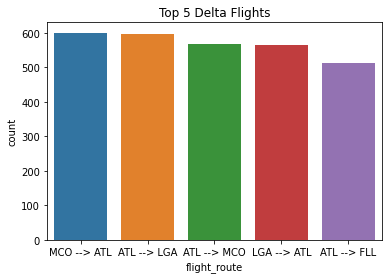

In [0]:
sns.barplot(x = "flight_route" , y = "count", data = most_common_dl.iloc[0:5 ,])
plt.title("Top 5 Delta Flights")

In [0]:
def plot_freq_flights(n):
  """ Plots the top n Delta flight routes in terms of frequency"""
  sns.barplot(x = "flight_route" , y = "count", data = most_common_dl.iloc[0:n ,])
  plt.title("Top " + str(n) + " Delta Flights")
  print("The top " + str(n) + " flights routes are: " + "\n" + str(most_common_dl.iloc[0:n , 0]))
  plt.xticks(rotation=90) 

The top 10 flights routes are: 
0    MCO --> ATL
1    ATL --> LGA
2    ATL --> MCO
3    LGA --> ATL
4    ATL --> FLL
5    ATL --> TPA
6    FLL --> ATL
7    ATL --> JAX
8    TPA --> ATL
9    JAX --> ATL
Name: flight_route, dtype: object


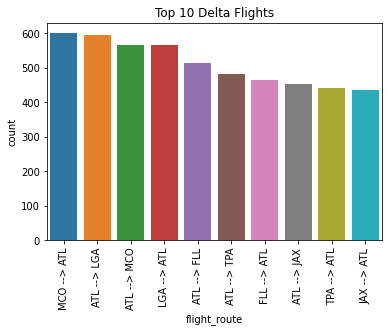

In [0]:
plot_freq_flights(10)

In [0]:
fares['flight_route'] = fares['origin_airport'] + ' --> ' + fares['destination_airport']
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> SGF
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> RDU
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC


In [0]:
  delta_fares = fares[fares["airline_id"] == "DL"]
  delta_fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC
9,1,DL,LGA,MCO,950,7,7,24,38,242,221,122,233,307,209,214,193,255,275,166,142,299,327,136,163,103,104,87,70,68,70,82,118,107,139,39,74,97,28,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,LGA --> MCO
10,1,DL,MSP,BOI,1142,7,11,8,6,19,23,20,32,42,32,37,49,45,28,35,29,42,27,34,24,33,25,35,30,23,24,19,25,15,10,20,19,17,16,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,MSP --> BOI


In [0]:
bins_df = delta_fares.iloc[:,5:].drop(columns = "flight_route")
count_by_bin = bins_df.sum()
bins_numeric = np.asarray(bins_df.columns).astype(np.float)
sum(count_by_bin * bins_numeric)

2791674770.0

In [0]:
# def compute_revenue(fare_df):
#   bins_df = delta_fares.iloc[:,5:].drop(columns = "flight_route")
#   count_by_bin = bins_df.sum()
#   bins_numeric = np.asarray(bins_df.columns).astype(np.float)
#   return sum(count_by_bin * bins_numeric)
  

In [0]:
bins_df = delta_fares.iloc[5,5:250].drop(columns = "flight_route").reset_index()
bins_df

,index,17
0,10,138
1,20,287
2,30,604
3,40,716
4,50,1505
...,...,...
240,2410,0
241,2420,0
242,2430,0
243,2440,0


In [0]:
bins_df = delta_fares.iloc[5,5:250].drop(columns = "flight_route").reset_index()
temp = bins_df.reset_index()
delta_fares["revenue"] = temp["index"].astype(np.float) * temp[17]
delta_fares.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route,revenue
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN,5740
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN,18120
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC,75250
9,1,DL,LGA,MCO,950,7,7,24,38,242,221,122,233,307,209,214,193,255,275,166,142,299,327,136,163,103,104,87,70,68,70,82,118,107,139,39,74,97,28,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,LGA --> MCO,81300
10,1,DL,MSP,BOI,1142,7,11,8,6,19,23,20,32,42,32,37,49,45,28,35,29,42,27,34,24,33,25,35,30,23,24,19,25,15,10,20,19,17,16,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,MSP --> BOI,85800


In [0]:
rev = delta_fares.sort_values("revenue", ascending = False).iloc[:,[2,3,4,255,256]]
rev.head()

,origin_airport,destination_airport,distance,flight_route,revenue
10,MSP,BOI,1142,MSP --> BOI,85800
9,LGA,MCO,950,LGA --> MCO,81300
17,ATL,FLL,581,ATL --> FLL,80640
4,ATL,RIC,481,ATL --> RIC,75250
18,ATL,MSP,907,ATL --> MSP,72010


In [0]:
most_rev = rev.iloc[:,[3,4]]
most_rev.head(30)

,flight_route,revenue
10,MSP --> BOI,85800
9,LGA --> MCO,81300
17,ATL --> FLL,80640
4,ATL --> RIC,75250
18,ATL --> MSP,72010
20,ATL --> RSW,65100
25,ATL --> SRQ,32500
30,MSP --> MSN,23250
31,DTW --> ALB,22080
29,DTW --> TPA,21900


In [0]:
# places with hubs have more?

Text(0.5, 1.0, 'Top 10 Delta Flights based on revenue')

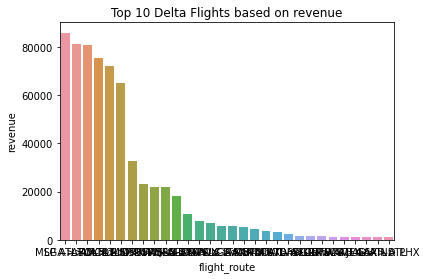

In [0]:
sns.barplot(x = "flight_route" , y = "revenue", data = most_rev.iloc[0:30 ,])
plt.title("Top 10 Delta Flights based on revenue")

Text(0.5, 1.0, 'Distance of top revenue flight routes')

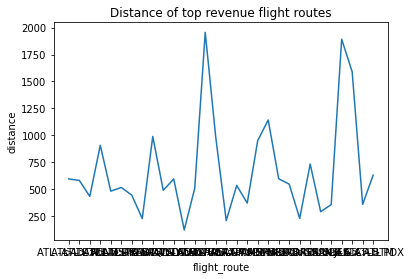

In [0]:
dist_by_rev = rev.iloc[:,[2,3]]
sns.lineplot(x = "flight_route" , y = "distance", data = dist_by_rev.iloc[0:30 ,])
plt.title("Distance of top revenue flight routes")

In [0]:
def plot_profitable_flights(n):
  """ Plots the top n Delta flight routes in terms of revenue"""
  sns.barplot(x = "flight_route" , y = "revenue", data = most_rev.iloc[0:n ,])
  plt.title("Top " + str(n) +" Delta Flights based on revenue")
  plt.xticks(rotation=90) 
  print("The top " + str(n) + " flights routes by revenue are: " + "\n" + str(most_rev.iloc[0:n , 0]))

The top 10 flights routes by revenue are: 
10    MSP --> BOI
9     LGA --> MCO
17    ATL --> FLL
4     ATL --> RIC
18    ATL --> MSP
20    ATL --> RSW
25    ATL --> SRQ
30    MSP --> MSN
31    DTW --> ALB
29    DTW --> TPA
Name: flight_route, dtype: object


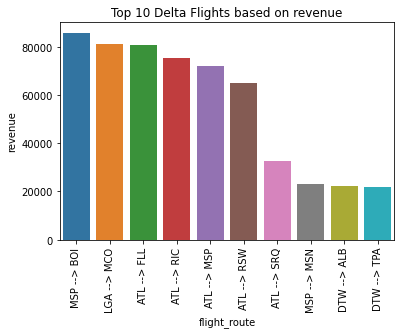

In [0]:
plot_profitable_flights(10)

Some Delta hubs:
1.  Atlanta
2.  Detroit
3. Los Angeles
4. Minneapolis
5. New York (JFK and LaGuardia)
5. Salt Lake City
6. Seattle

In [0]:
by_rev_dist = rev.sort_values(["revenue","distance"], ascending = False)
by_rev_dist.head()

,origin_airport,destination_airport,distance,flight_route,revenue
10,MSP,BOI,1142,MSP --> BOI,85800
9,LGA,MCO,950,LGA --> MCO,81300
17,ATL,FLL,581,ATL --> FLL,80640
4,ATL,RIC,481,ATL --> RIC,75250
18,ATL,MSP,907,ATL --> MSP,72010


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

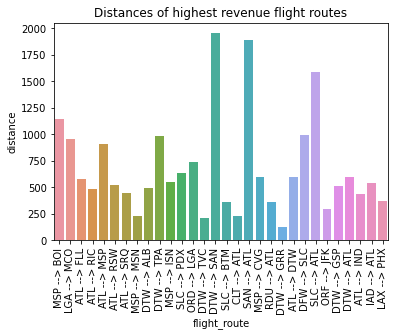

In [0]:
sns.barplot(x = "flight_route", y = "distance", data = by_rev_dist.iloc[0: 30, ])
plt.title("Distances of highest revenue flight routes")
plt.xticks(rotation=90) 


In [0]:
by_rev_dist.iloc[0: 10, ]["distance"].mean()

672.0

The highest revenue flight routes have distances averaging around 672 miles on average for the top 10 highest revenue flights routes.

In [0]:
by_rev_dist.iloc[0: 20, ]["distance"].mean()

711.0

In [0]:
by_rev_dist["distance"].mean()

839.7546084897683

Text(0.5, 1.0, 'Revenue of highest revenue and distance flight routes')

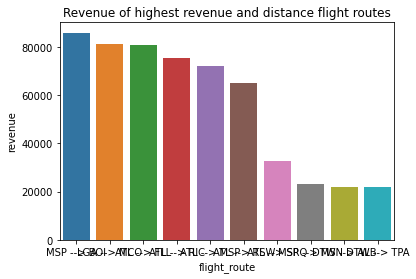

In [0]:
sns.barplot(x = "flight_route", y = "revenue", data = by_rev_dist.iloc[0: 10, ])
plt.title("Revenue of highest revenue and distance flight routes")

In [0]:
other_rev = delta_fares.sort_values("revenue", ascending = False).iloc[:,[0,2,3,4,255,256]]
other_rev.head()

,quarter,origin_airport,destination_airport,distance,flight_route,revenue
10,1,MSP,BOI,1142,MSP --> BOI,85800
9,1,LGA,MCO,950,LGA --> MCO,81300
17,1,ATL,FLL,581,ATL --> FLL,80640
4,1,ATL,RIC,481,ATL --> RIC,75250
18,1,ATL,MSP,907,ATL --> MSP,72010


In [0]:
other_rev[other_rev["quarter"] == 4]

,quarter,origin_airport,destination_airport,distance,flight_route,revenue
61179,4,BOS,LGA,184,BOS --> LGA,NaN
61195,4,DCA,LGA,214,DCA --> LGA,NaN
61204,4,DFW,LGA,1389,DFW --> LGA,NaN
61217,4,IAH,LGA,1416,IAH --> LGA,NaN
61219,4,IND,BOS,818,IND --> BOS,NaN
...,...,...,...,...,...,...
79032,4,LEX,IAH,828,LEX --> IAH,NaN
79248,4,LIH,OGG,201,LIH --> OGG,NaN
79762,4,AUS,CVG,958,AUS --> CVG,NaN
80371,4,LAS,RDU,2026,LAS --> RDU,NaN


There are some constraints and limitations because we do not have data to distinguish which flights might be connections or part of an itinerary, and so, there are flights which are outbound to large connecting airports for layovers. Or perhaps even layovers to connect to international flights.

Some other factors to consider:

*   college students moving in and out of their dorms or universities at the end of summer, beginning of the school year, and winter break.
*   In the spring time, there might also be more flights for students' spring break or weddings.
*   In the summer time, more families travel with their children.





In [0]:
def revenue_by_route(airline_id):
  """Given an airline id, returns a dataframe and visualization for top profitable routes"""
  grouped_route = flight[["airline_id","quarter","flight_route"]].groupby(["airline_id","quarter","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
  airline_routes = grouped_route[grouped_route["airline_id"]==airline_id]
  fares["route_revenue"] = row_rev
  routes_fare = fares[["quarter","airline_id","distance","route_revenue","flight_route"]]
  airline_routes_fare = routes_fare[routes_fare["airline_id"] == airline_id]
  airline_routes_fare.sort_values("route_revenue",ascending=False).head(10)
  route_rev = airline_routes.merge(airline_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
  new_by_route_rev = route_rev.groupby("flight_route").sum().reset_index().sort_values("route_revenue", ascending=False).iloc[:, [0, 2,3,4]]
  plot = sns.barplot(x = "flight_route" , y = "route_revenue", data = new_by_route_rev.iloc[:10, ])
  plt.xticks(rotation=90) 
  plt.title("Top 10 most profitable routes for " + airline_id)
  return new_by_route_rev, plot

In [0]:
revenue_by_route("DL")
revenue_by_route("WN")
revenue_by_route("AA")
revenue_by_route("UA")

KeyError: ignored